In [2]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt
import time

Xét hàm số: $ f(x) = x^2 + 10\sin{x} $ có đạo hàm
$x_{t+1} = 2x_t - \eta (2x_t + 10\cos{x_t})$

In [3]:
def grad(x):
    return 2*x+ 10*np.cos(x)

def cost(x):
    return x**2 + 10*np.sin(x)

def myGD1(eta, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

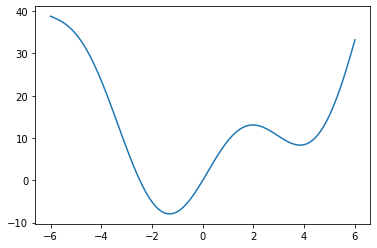

In [4]:
x = np.linspace(-6,6,100)
y = x**2 + 10*np.sin(x)
plt.plot(x, y)
plt.show()

In [5]:
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.306528, cost = -7.945823, obtained after 7 iterations
Solution x2 = 3.836788, cost = 8.315588, obtained after 4 iterations


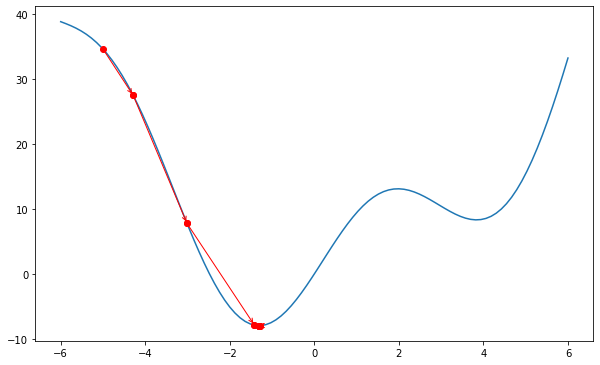

In [6]:
plt.ion()
x = np.linspace(-6,6,100)
y = x**2 + 10*np.sin(x)
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize =(10,6.15))
ax.plot(x, y)
for i in range(len(x1)-1):
    ax.plot([x1[i],x1[i+1]], [cost(x1[i]),cost(x1[i+1])],'ro')
    ax.annotate('', xy=(x1[i+1], cost(x1[i+1])), xytext=(x1[i], cost(x1[i])),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

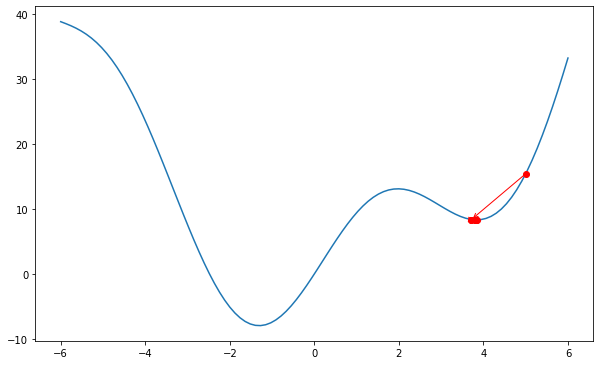

In [7]:
x = np.linspace(-6,6,100)
y = x**2 + 10*np.sin(x)
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize =(10,6.15))
ax.plot(x, y)
for i in range(len(x2)-1):
    ax.plot([x2[i],x2[i+1]], [cost(x2[i]),cost(x2[i+1])],'ro')
    ax.annotate('', xy=(x2[i+1], cost(x2[i+1])), xytext=(x2[i], cost(x2[i])),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

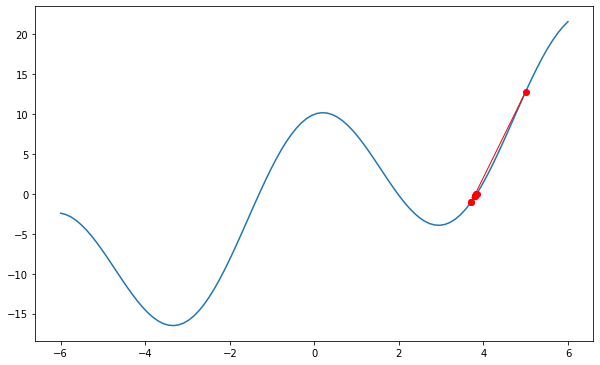

In [8]:
x = np.linspace(-6,6,100)
y = x*2 + 10*np.cos(x)
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize =(10,6.15))
ax.plot(x, y)
for i in range(len(x2)-1):
    ax.plot([x2[i],x2[i+1]], [grad(x2[i]),grad(x2[i+1])],'ro')
    ax.annotate('', xy=(x2[i+1], grad(x2[i+1])), xytext=(x2[i], grad(x2[i])),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

Solution found by formula: w =  [[4.00774003 2.97140006]]


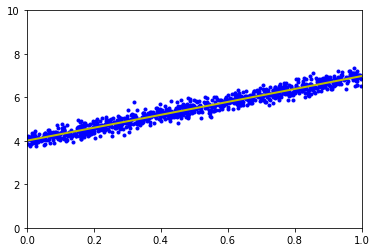

In [9]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

## Optimize Gradient Descent

In [61]:
# check convergence
def has_converged(theta_new):

    return np.linalg.norm(grad(theta_new))/ theta_new < 1e-3

def GD_momentum(theta_init, eta, gamma):
    
    """
    params:
    theta_init: start point
    eta: learning rate
    gamma: momentum parameter
    """
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        
        
        
        v_new = gamma * v_old + eta*grad(theta[-1])
        
        theta_new = theta[-1] - v_new
        theta.append(theta_new)
        if has_converged(theta_new):
            break 
            
       
        
        v_old = v_new
    return (theta, it) 
    # this variable includes all points in the path

In [62]:
x1, it1 = GD_momentum(5, 0.1, 0.99)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))

0.960633026050477 3.7163378145367734
3.170108486641297 2.541575553533227
2.1466243339311757 1.6955717638038459
9.287544264968897 0.6433655785786407
0.24096987271516923 -1.327072971291202
Solution x1 = -1.327073, cost = -7.943339, obtained after 4 iterations


In [55]:
x1

[5,
 3.7163378145367734,
 2.541575553533227,
 1.6955717638038459,
 0.6433655785786407,
 -1.327072971291202]

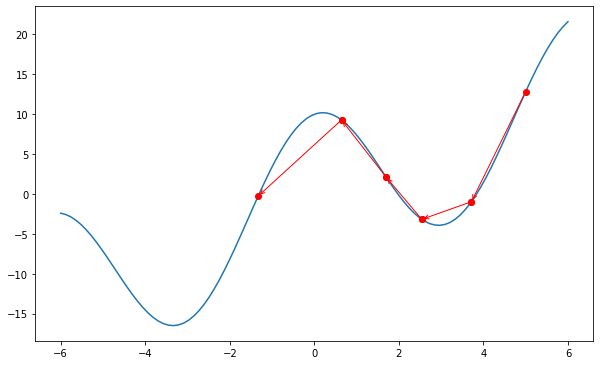

In [56]:
plt.ion()
x = np.linspace(-6,6,100)
y = x*2 + 10*np.cos(x)
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize =(10,6.15))
ax.plot(x, y)
for i in range(len(x1)-1):
    ax.plot([x1[i],x1[i+1]], [grad(x1[i]),grad(x1[i+1])],'ro')
    ax.annotate('', xy=(x1[i+1], grad(x1[i+1])), xytext=(x1[i], grad(x1[i])),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

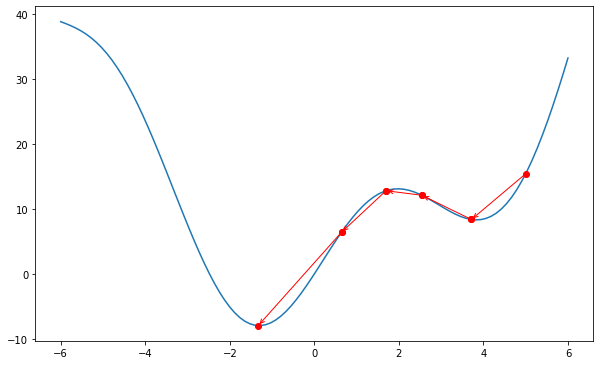

In [57]:
plt.ion()
x = np.linspace(-6,6,100)
y = x**2 + 10*np.sin(x)
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize =(10,6.15))
ax.plot(x, y)
for i in range(len(x1)-1):
    ax.plot([x1[i],x1[i+1]], [cost(x1[i]),cost(x1[i+1])],'ro')
    ax.annotate('', xy=(x1[i+1], cost(x1[i+1])), xytext=(x1[i], cost(x1[i])),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

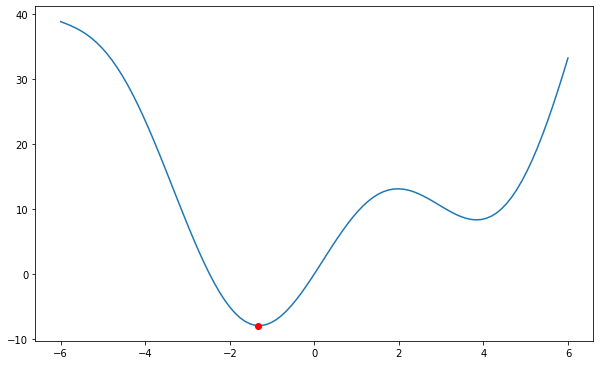

In [58]:
plt.ion()
x = np.linspace(-6,6,100)
y = x**2 + 10*np.sin(x)
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize =(10,6.15))
ax.plot(x, y)
ax.plot([x1[-1]], [cost(x1[-1])],'ro')


## Nesterov accelerated gradient